# Exploratory Data Analysis
This notebook explores the Heart Failure Prediction Dataset to understand its features, distributions, and potential issues.

In [1]:
# Enable autoreload for imports
%load_ext autoreload
%autoreload 2

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from config import config

In [2]:
# Load the datasets
train_data = pd.read_csv(config.datapath / Path("train_val_split.csv"))
test_data = pd.read_csv(config.datapath / Path("test_split.csv"))

In [3]:
train_data.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,734.000000,734,734,734.00000,734.000000,734.000000,734,734.000000,734,734.000000,734,734.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,573,381,NaN,NaN,NaN,440,NaN,439,NaN,364,NaN
mean,53.523161,NaN,NaN,132.06267,197.588556,0.232970,NaN,136.167575,NaN,0.873978,NaN,0.542234
std,9.421110,NaN,NaN,18.61849,108.979439,0.423012,NaN,25.334552,NaN,1.082222,NaN,0.498553
min,29.000000,NaN,NaN,0.00000,0.000000,0.000000,NaN,60.000000,NaN,-2.000000,NaN,0.000000
25%,47.000000,NaN,NaN,120.00000,172.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.00000,222.000000,0.000000,NaN,138.000000,NaN,0.500000,NaN,1.000000
75%,60.000000,NaN,NaN,140.00000,267.000000,0.000000,NaN,155.000000,NaN,1.500000,NaN,1.000000


In [4]:
test_data.describe(include="all")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,184.000000,184,184,184.000000,184.000000,184.000000,184,184.000000,184,184.000000,184,184.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,152,115,NaN,NaN,NaN,112,NaN,108,NaN,96,NaN
mean,53.461957,NaN,NaN,133.728261,203.630435,0.233696,NaN,139.369565,NaN,0.940761,NaN,0.597826
std,9.504021,NaN,NaN,18.080333,111.152602,0.424335,NaN,25.867344,NaN,1.002740,NaN,0.491675
min,28.000000,NaN,NaN,92.000000,0.000000,0.000000,NaN,71.000000,NaN,-2.600000,NaN,0.000000
25%,48.000000,NaN,NaN,120.000000,176.750000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,140.000000,NaN,1.000000,NaN,1.000000
75%,60.000000,NaN,NaN,145.250000,265.250000,0.000000,NaN,160.000000,NaN,1.600000,NaN,1.000000


## Exploring the features, their distribution and the labels in train and test set

In [5]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label = 'HeartDisease'

In [6]:
# Assign the data types for the features
# Convert numerical features to float and categorical features to category
for feature in numerical_features:
    train_data[feature] = train_data[feature].astype(float)
for feature in categorical_features:
    train_data[feature] = train_data[feature].astype("category")
    
for feature in numerical_features:
    test_data[feature] = test_data[feature].astype(float)
for feature in categorical_features:
    test_data[feature] = test_data[feature].astype("category")
    
# Convert the label to category
train_data['HeartDisease'] = train_data['HeartDisease'].astype('category')
test_data['HeartDisease'] = test_data['HeartDisease'].astype('category')

In [7]:
# Create custom color palette
custom_palette = {
    0: '#007894',  # ETH petrol for no heart disease 
    1: '#B7352D'   # ETH red for heart disease 
}

# Set the style and palette
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(list(custom_palette.values())))

In [8]:
# Auxiliary function to plot features seprately for train and test data
def plot_features(train_data, numerical_features, categorical_features, label):
    """
    Generate a figure with subplots in a grid layout to present the categorical features 
    with barplots and the numerical features with distributions, hue=label.
    Also includes a label distribution plot.
    """
    # Set Seaborn theme for better aesthetics
    sns.set_theme(style="whitegrid")

    total_features = len(numerical_features) + len(categorical_features) + 1  # +1 for label plot
    rows = (total_features + 2) // 3  # Calculate number of rows (3 columns)
    
    # Create a figure with subplots in a grid with more vertical space
    fig = plt.figure(figsize=(18, 5 * rows))
    gs = fig.add_gridspec(rows, 3, hspace=0.4)
    axes = gs.subplots(sharex=False, sharey=False)
    axes = axes.flatten()

    # Plot label distribution first
    sns.countplot(data=train_data, x=label, palette={str(k): v for k, v in custom_palette.items()}, ax=axes[0])
    axes[0].set_title(f"Distribution of {label}", pad=5)
    axes[0].set_xlabel(label)
    axes[0].set_ylabel("Count")
    
    # Plot numerical features
    for i, feature in enumerate(numerical_features, start=1):
        sns.histplot(data=train_data, x=feature, hue=label, kde=True, palette=custom_palette, ax=axes[i])
        axes[i].set_title(f"Distribution of {feature}", pad=5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Count")
        
    # Plot categorical features
    for i, feature in enumerate(categorical_features, start=len(numerical_features)+1):
        sns.countplot(data=train_data, x=feature, hue=label, palette=custom_palette, ax=axes[i])
        axes[i].set_title(f"Barplot of {feature}", pad=5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Count")
        # Rotate x-labels and adjust their position
        axes[i].tick_params(axis='x', labelsize=10)
        
    # Remove empty subplots if any
    for i in range(total_features, len(axes)):
        fig.delaxes(axes[i])

    # Add a title for the entire figure
    plt.suptitle("Feature Distributions and Barplots", fontsize=16)
    plt.show()


/var/folders/4c/g8n4mrt53ql0ynrrmy4jk0tr0000gn/T/ipykernel_51002/714115102.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=label, palette={str(k): v for k, v in custom_palette.items()}, ax=axes[0])


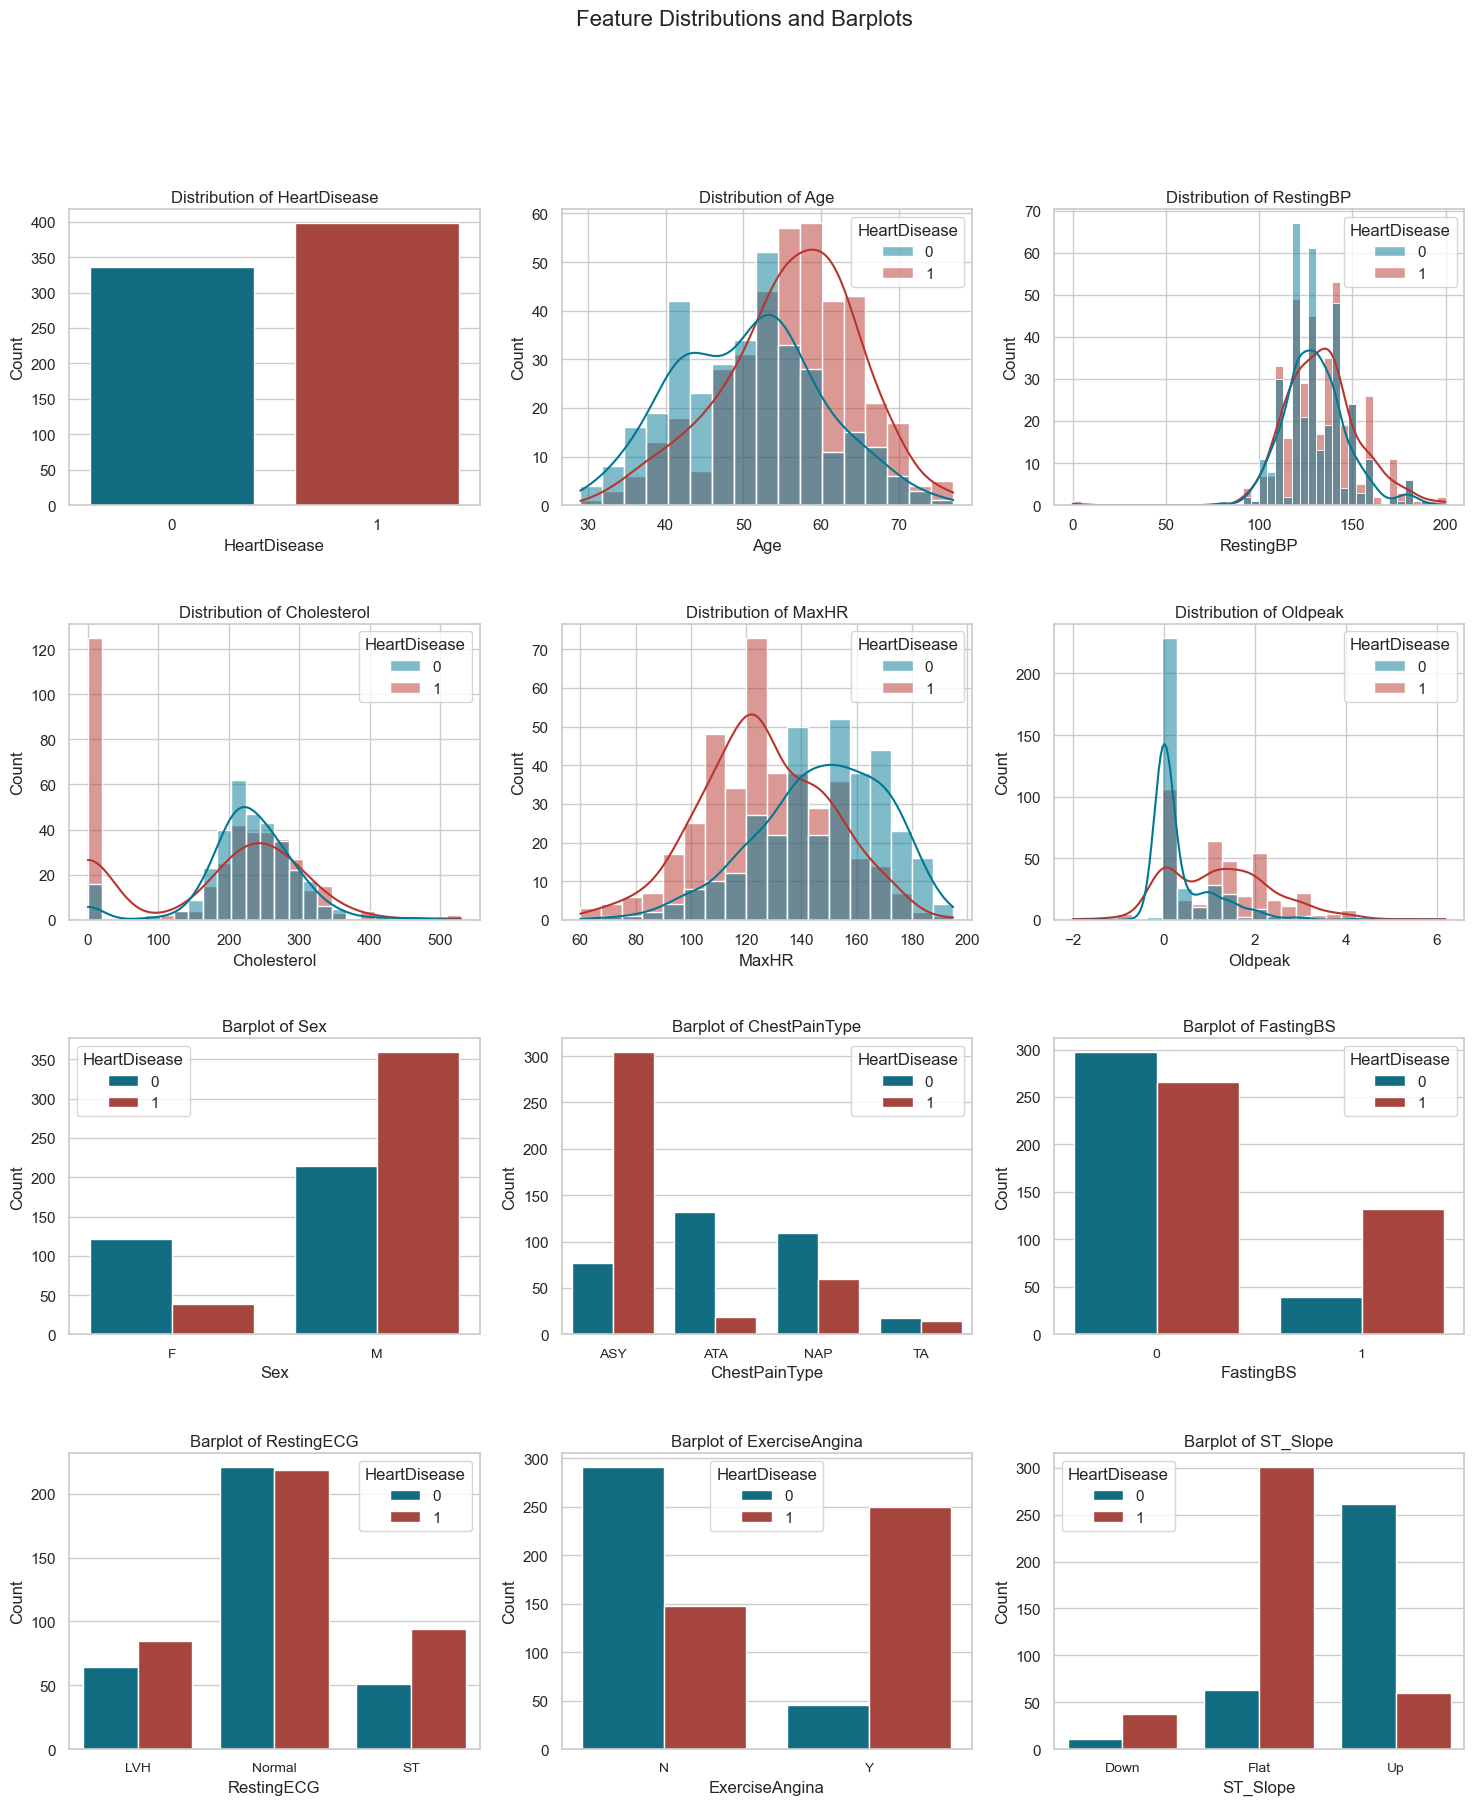

In [9]:
plot_features(train_data, numerical_features, categorical_features, label)

/var/folders/4c/g8n4mrt53ql0ynrrmy4jk0tr0000gn/T/ipykernel_51002/714115102.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=label, palette={str(k): v for k, v in custom_palette.items()}, ax=axes[0])


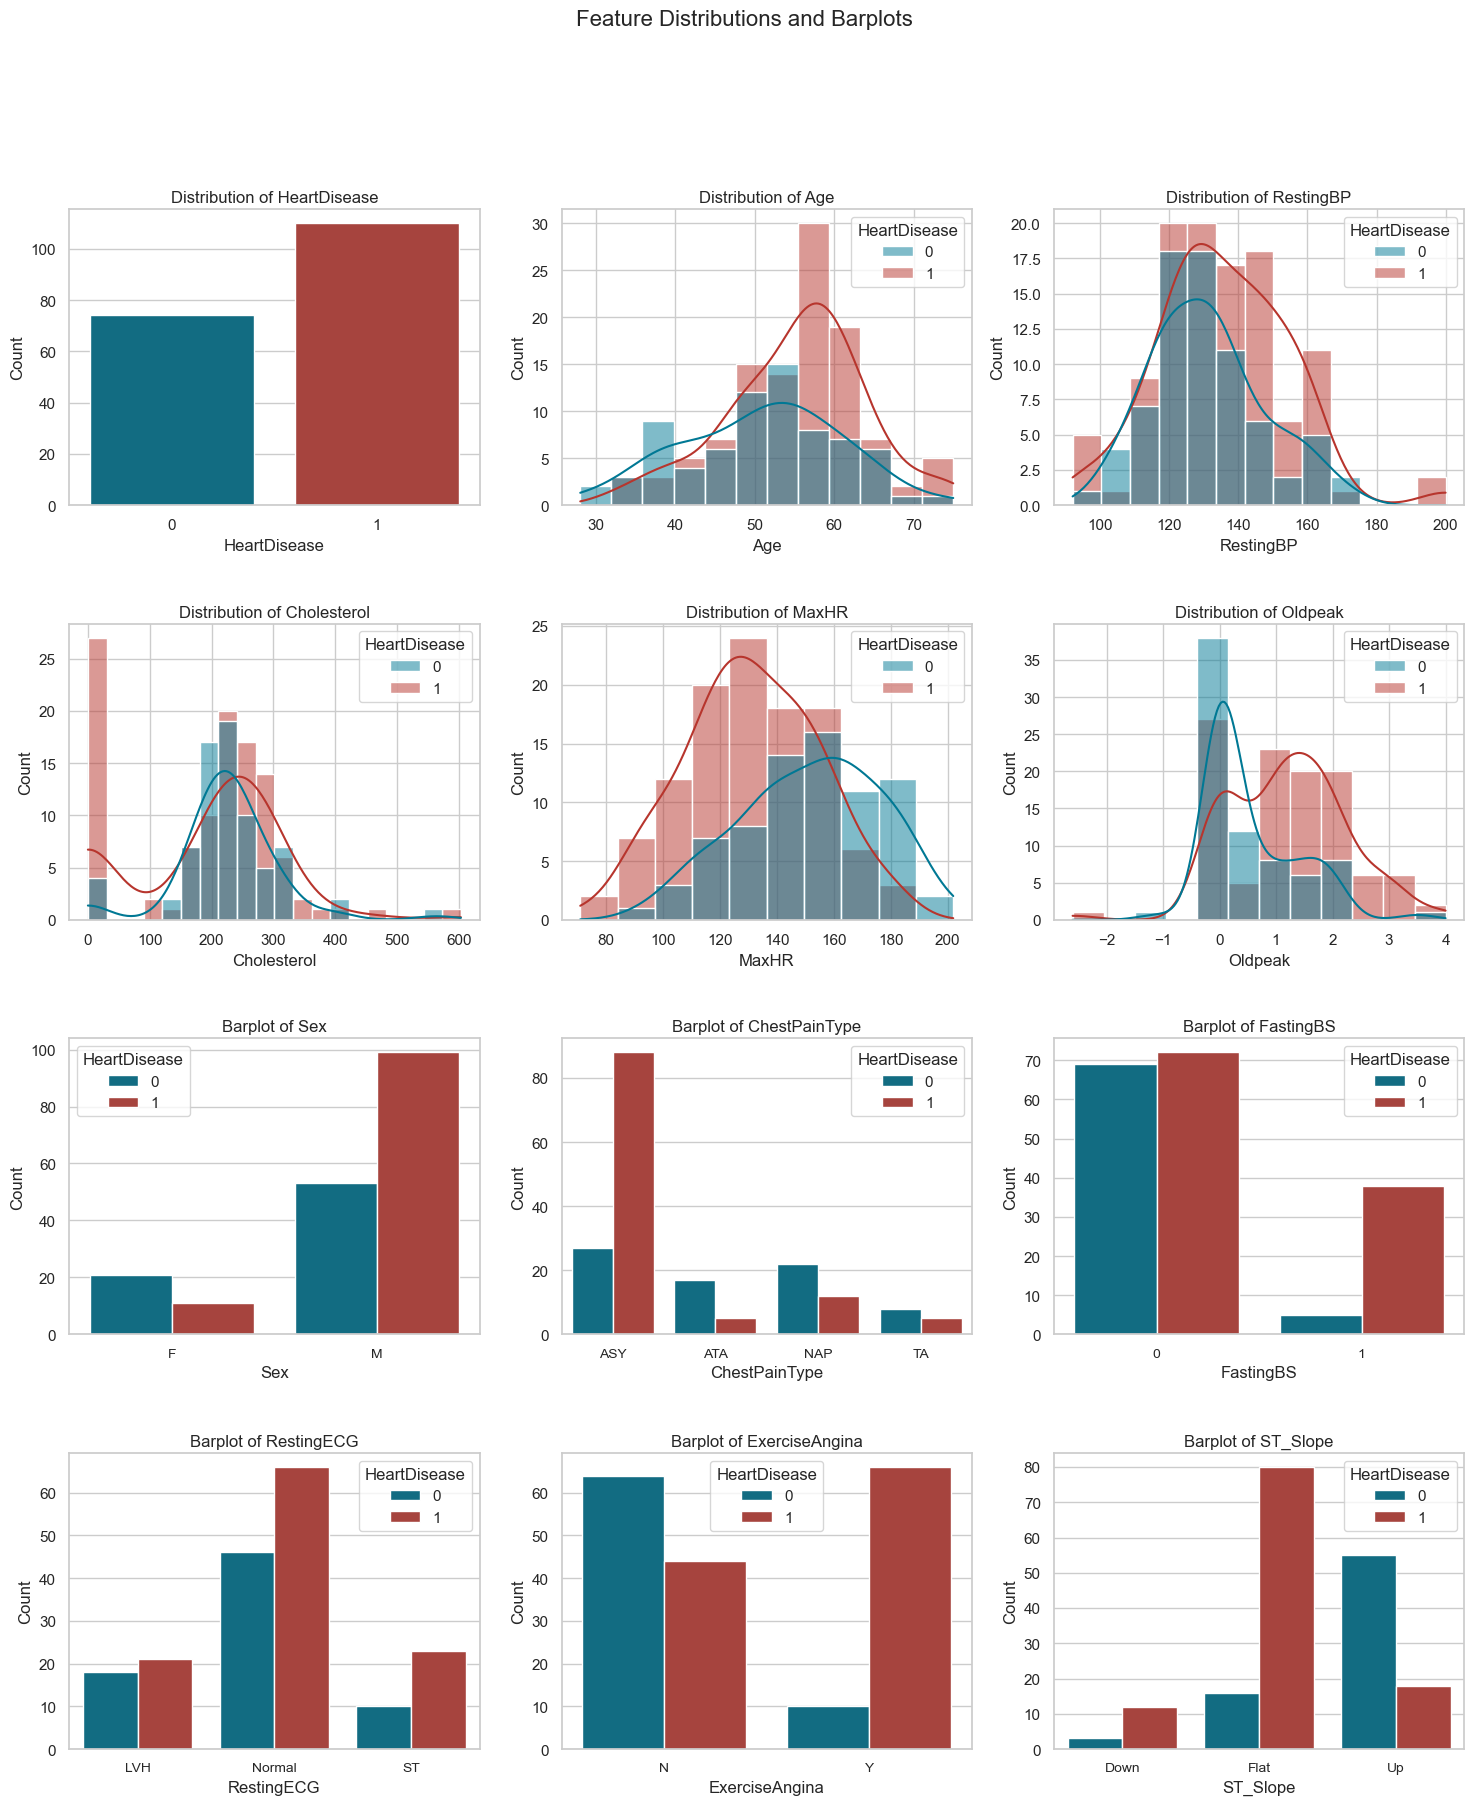

In [10]:
plot_features(test_data, numerical_features, categorical_features, label)

### Plot the pairplots to visually review potential correlated features (for the numerical values)

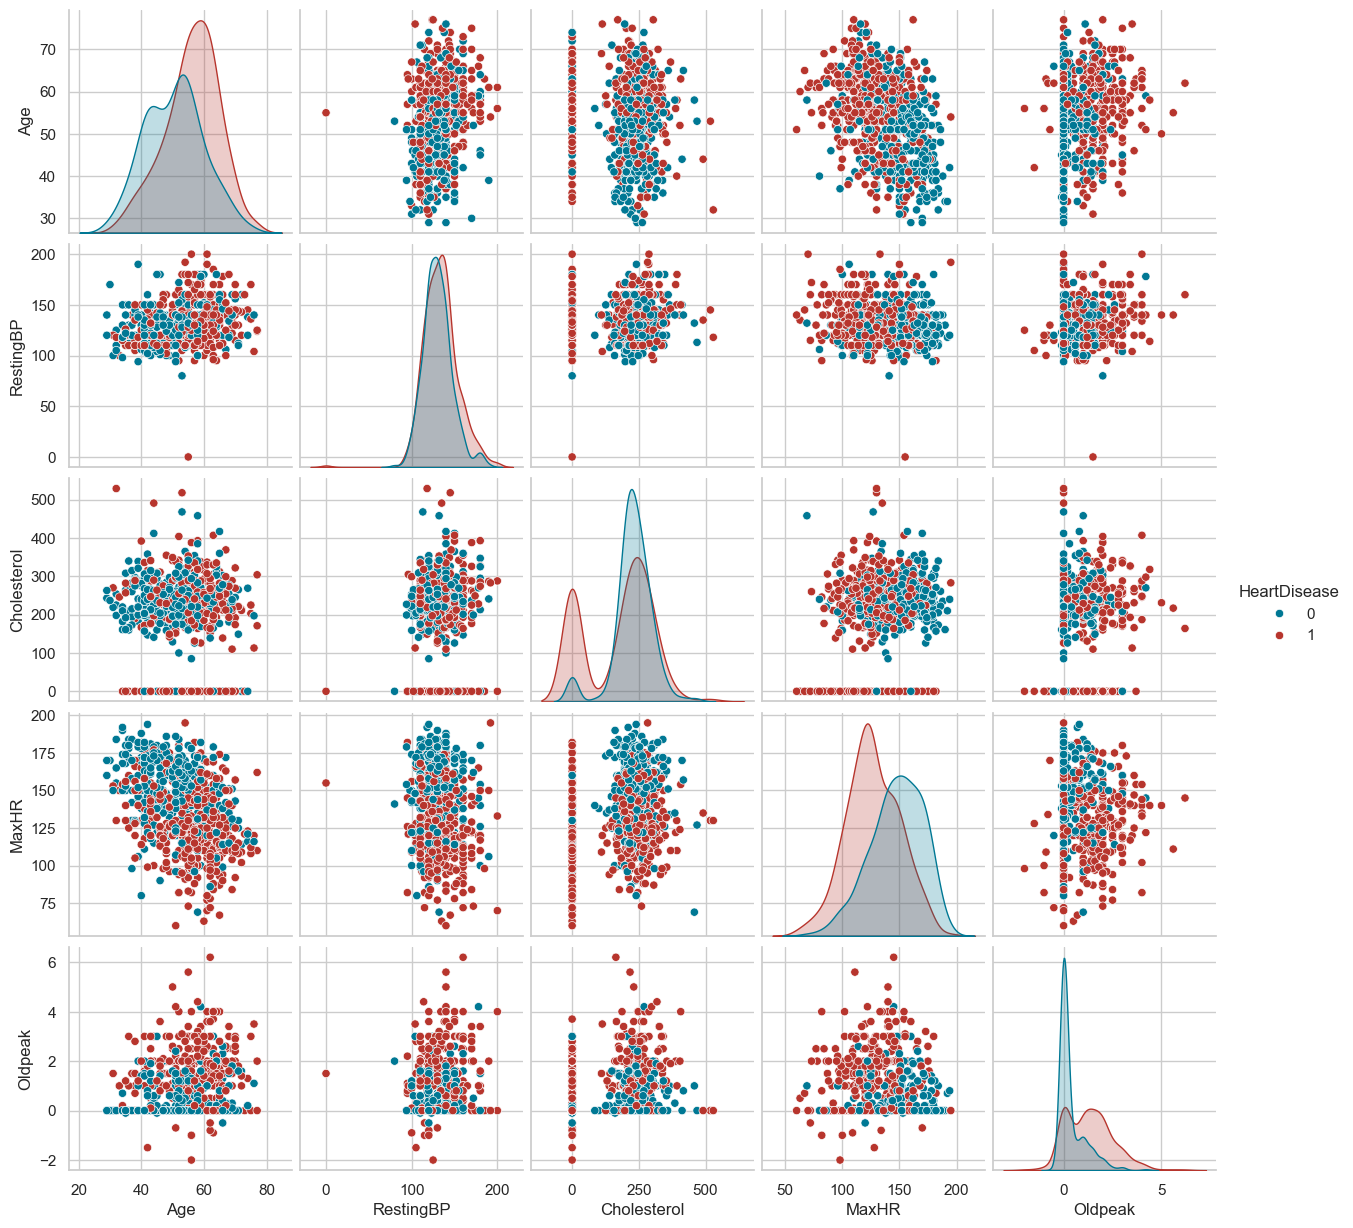

In [11]:
sns.pairplot(train_data, hue='HeartDisease', vars=numerical_features, palette=custom_palette)
plt.show()

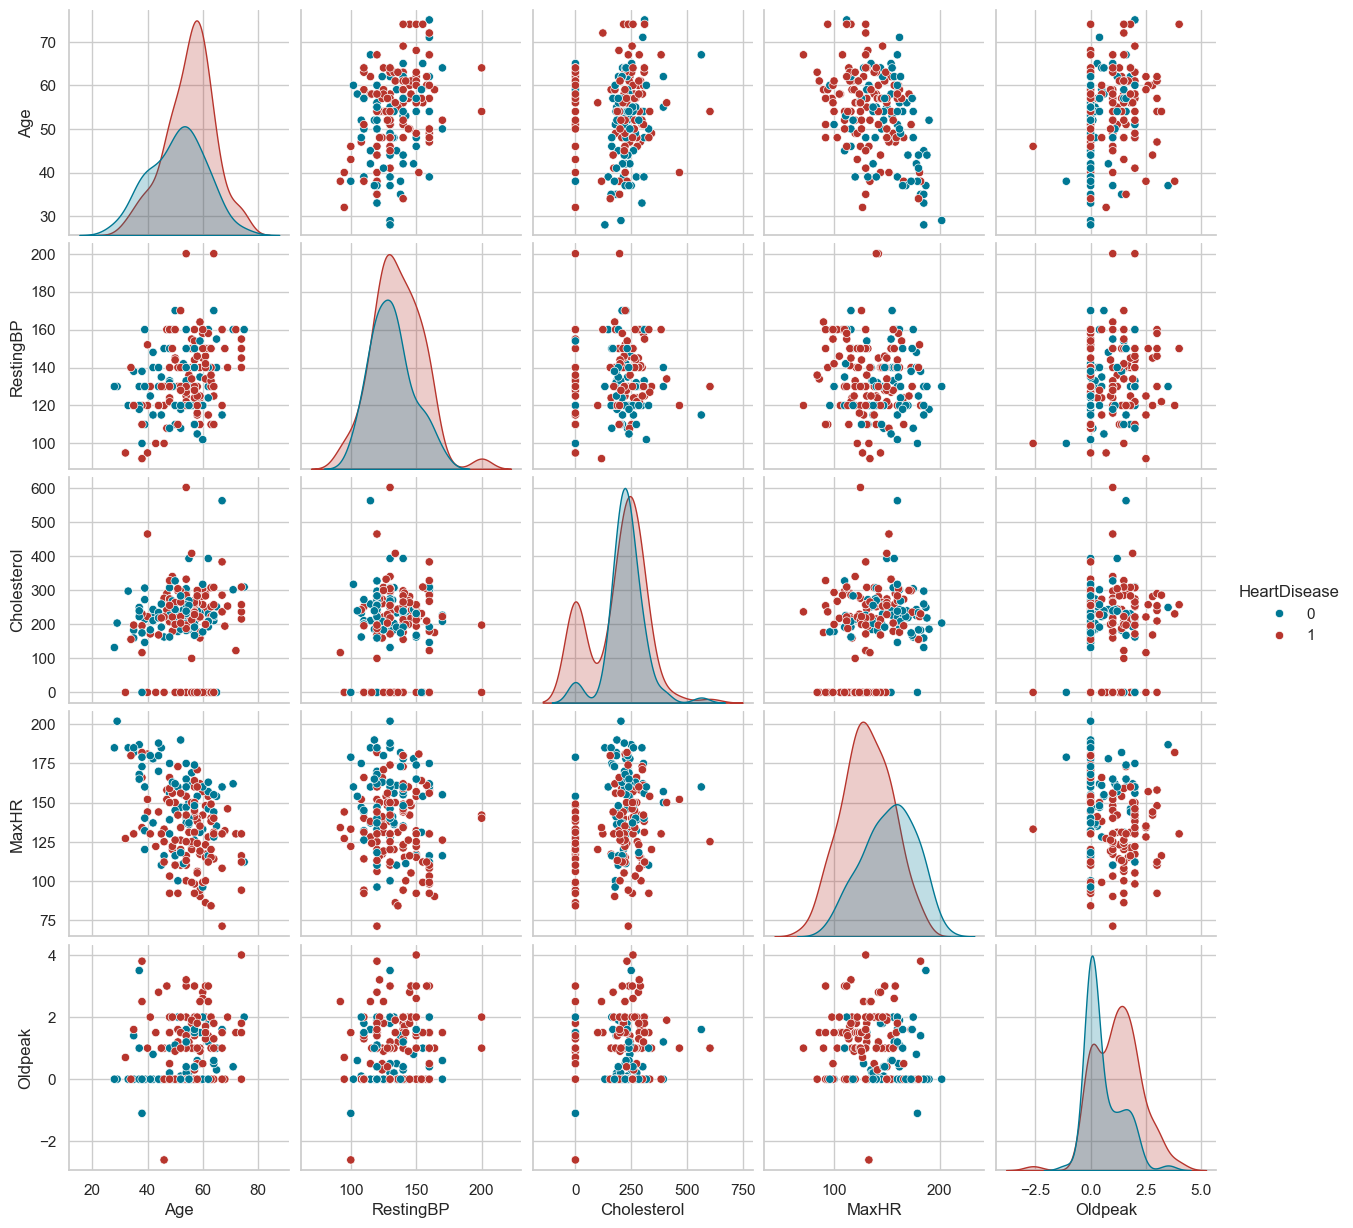

In [12]:
sns.pairplot(test_data, hue='HeartDisease', vars=numerical_features, palette=custom_palette)
plt.show()

### Plot the train and test sets together

In [13]:
# Create a copy of each dataset and add a source column
train_with_source = train_data.copy()
test_with_source = test_data.copy()

train_with_source['Source'] = 'train'
test_with_source['Source'] = 'test'

# Concatenate the datasets
combined_data = pd.concat([train_with_source, test_with_source], axis=0, ignore_index=True)

/var/folders/4c/g8n4mrt53ql0ynrrmy4jk0tr0000gn/T/ipykernel_51002/2597489587.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_source_cat = temp_df.groupby(['Source', feature]).size().reset_index(name='total')
/var/folders/4c/g8n4mrt53ql0ynrrmy4jk0tr0000gn/T/ipykernel_51002/2597489587.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_source_cat = temp_df.groupby(['Source', feature]).size().reset_index(name='total')
/var/folders/4c/g8n4mrt53ql0ynrrmy4jk0tr0000gn/T/ipykernel_51002/2597489587.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True

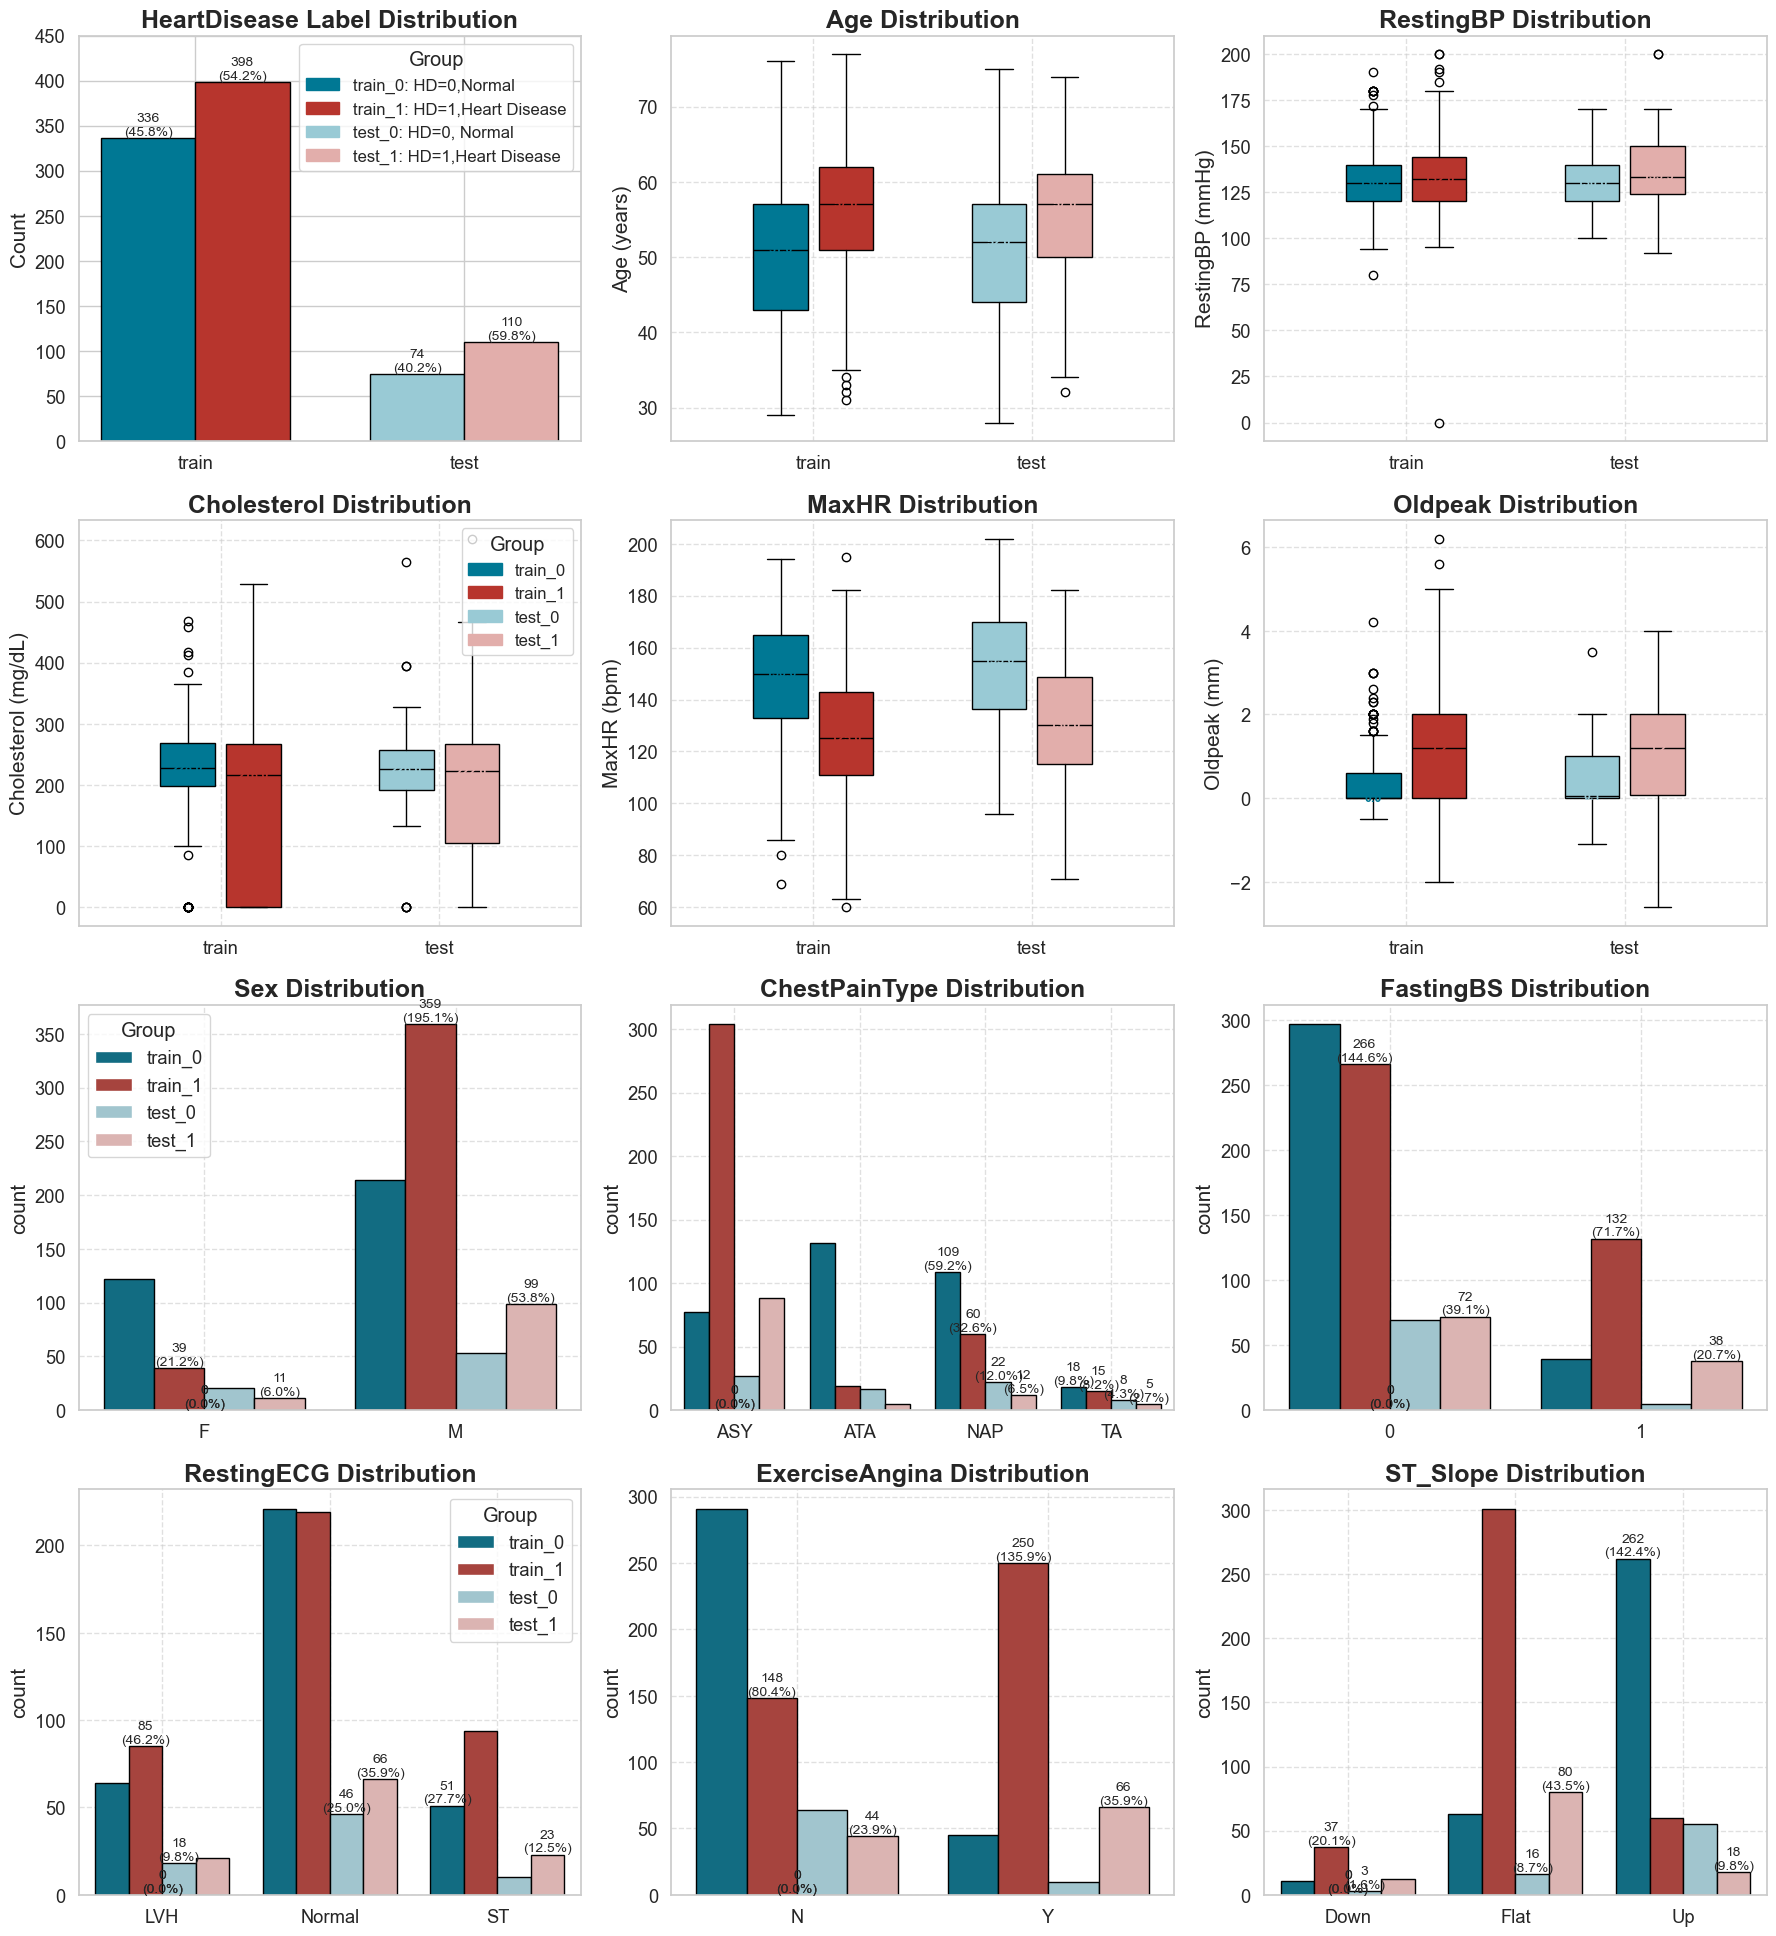

In [ ]:
# Set seaborn style
sns.set_theme(style="whitegrid", font_scale=1.2, rc={"axes.titlesize":18, "axes.labelsize":15})

# Define palettes and units
palette_cat = {
    'train_0': "#007894",
    'train_1': "#B7352D",
    'test_0': "#99CAD5",
    'test_1': "#E2AEAB"
}
units = {
    'Age': 'years',
    'RestingBP': 'mmHg',
    'Cholesterol': 'mg/dL',
    'MaxHR': 'bpm',
    'Oldpeak': 'mm',
}

# Prepare figure
n_num = len(numerical_features)
n_cat = len(categorical_features)
n_total = 1 + n_num + n_cat
n_cols = 3
n_rows = (n_total + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))
axes = axes.flatten()

# Label distribution plot
ax_label = axes[0]
label_df = combined_data.copy()
label_df['Group'] = label_df['Source'] + '_' + label_df['HeartDisease'].astype(str)

# Prepare counts for each group
order = ['train_0', 'train_1', 'test_0', 'test_1']
source_map = {'train_0': 'train', 'train_1': 'train', 'test_0': 'test', 'test_1': 'test'}
hd_map = {'train_0': 0, 'train_1': 1, 'test_0': 0, 'test_1': 1}
counts = label_df['Group'].value_counts().reindex(order, fill_value=0)
train_total = (label_df['Source'] == 'train').sum()
test_total = (label_df['Source'] == 'test').sum()

# Bar positions
bar_width = 0.35
x_locs = [0 - bar_width/2, 0 + bar_width/2, 1 - bar_width/2, 1 + bar_width/2]
xticks = [0, 1]
xticklabels = ['train', 'test']

for i, key in enumerate(order):
    x = x_locs[i]
    count = counts[key]
    source = source_map[key]
    total = train_total if source == 'train' else test_total
    percent = (count / total * 100) if total > 0 else 0
    color = palette_cat[key]
    bar = ax_label.bar(x, count, width=bar_width, color=color, edgecolor='black', linewidth=1)
    # Annotate
    ax_label.annotate(
        f'{int(count)}\n({percent:.1f}%)',
        (x, count),
        ha='center', va='bottom', fontsize=10
    )

ax_label.set_xticks(xticks)
ax_label.set_yticks([0,50,100,150,200,250,300,350,400,450])
ax_label.set_xticklabels(xticklabels)
ax_label.set_title('HeartDisease Label Distribution', weight='bold')
ax_label.set_xlabel('')
ax_label.set_ylabel('Count')

# Custom legend
handles = [plt.Rectangle((0,0),1,1, color=palette_cat[k]) for k in order]
legend_labels = ['train_0: HD=0,Normal', 'train_1: HD=1,Heart Disease', 'test_0: HD=0, Normal', 'test_1: HD=1,Heart Disease']
ax_label.legend(handles, legend_labels, title="Group", loc='upper right', fontsize=12)


# Numerical features 
for idx, feature in enumerate(numerical_features, start=1):
    ax = axes[idx]
    
    # Prepare data for each group
    train_0 = combined_data[(combined_data['Source'] == 'train') & (combined_data['HeartDisease'] == 0)][feature]
    train_1 = combined_data[(combined_data['Source'] == 'train') & (combined_data['HeartDisease'] == 1)][feature]
    test_0 = combined_data[(combined_data['Source'] == 'test') & (combined_data['HeartDisease'] == 0)][feature]
    test_1 = combined_data[(combined_data['Source'] == 'test') & (combined_data['HeartDisease'] == 1)][feature]
    
    data = [train_0, train_1, test_0, test_1]
    positions = [0.85, 1.15, 1.85, 2.15]  # Centered under "train" (1) and "test" (2)
    colors = [
        palette_cat['train_0'], 
        palette_cat['train_1'], 
        palette_cat['test_0'], 
        palette_cat['test_1']
    ]
    
    # Boxplots
    bp = ax.boxplot(
        data, 
        positions=positions, 
        widths=0.25, 
        patch_artist=True,
        medianprops={'color': 'black'}
    )
    
    # Set colors and style
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    # Set x-ticks and labels
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['train', 'test'])
    
    # Add median annotations
    for i, (box, median_line) in enumerate(zip(bp['boxes'], bp['medians'])):
        median = median_line.get_ydata()[0]
        ax.text(
            positions[i],
            median,
            f'{median:.1f}',
            ha='center', 
            va='center', 
            fontsize=9,
            color=colors[i], 
            weight='bold'
        )
    
    # Labels and styling
    unit = units.get(feature, '')
    ylabel = f'{feature} ({unit})' if unit else feature
    ax.set_title(f'{feature} Distribution', weight='bold')
    ax.set_ylabel(ylabel)
    ax.grid(True, linestyle='--', alpha=0.6)
    # Check if legend exists before removal
    if idx % n_cols != 0:
        legend = ax.get_legend()
        if legend is not None:
            legend.remove()
    else:
        handles = [plt.Rectangle((0,0),1,1, color=c) for c in palette_cat.values()]
        legend_labels = ['train_0', 'train_1', 'test_0', 'test_1']
        ax.legend(handles, legend_labels, title="Group", loc='upper right', fontsize=12)
    
    ax.grid(True, linestyle='--', alpha=0.6)

# Categorical features 
for idx, feature in enumerate(categorical_features, start=1+n_num):
    ax = axes[idx]
    temp_df = combined_data[combined_data[feature].notna()].copy()
    temp_df['Group'] = temp_df['Source'] + '_' + temp_df['HeartDisease'].astype(str)
    
    # Calculate percentages relative to each source and category
    total_per_source_cat = temp_df.groupby(['Source', feature]).size().reset_index(name='total')
    sns.countplot(
        data=temp_df, x=feature, hue='Group', ax=ax,
        palette=palette_cat, hue_order=["train_0", "train_1", "test_0", "test_1"], width=0.8
    )
    
    # Add black outlines
    for patch in ax.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)
    
    # Collect all annotation data
    annotations = []
    for i, p in enumerate(ax.patches):
        # Get corresponding absolute value, source, feature category, and HD status
        height = p.get_height()
        category = p.get_x()
        Group = ["train_0", "train_1", "test_0", "test_1"][i % 4]
        source, hd = Group.split('_')
        
        # Calculate percentage relative to source
        if source == 'train':
            total = 734
        else:
            total = 184
        
            percent = (p.get_height() / total) * 100 if total > 0 else 0
            
            # Store annotation data
            annotations.append({
                'x': p.get_x() + p.get_width() / 2,
                'height': height,
                'percent': percent,
                'index': i
            })
    
    # Sort annotations by height (ascending)
    annotations.sort(key=lambda a: a['height'])
    
    # Track used positions to prevent overlaps
    used_positions = {}
    
    # Place annotations with smart positioning
    for anno in annotations:
        x = anno['x']
        height = anno['height']
        percent = anno['percent']
        
        # Determine text and styling based on bar height
        if height < 20:  # Very short bars
            fontsize = 7
            text = f'{int(height)}\n({percent:.1f}%)'
            y_pos = height + 5  # Initial position above bar
            
            # Check for overlaps
            if x in used_positions:
                # Find a position that doesn't overlap
                while any(abs(y_pos - y) < 20 for y in used_positions[x]):
                    y_pos += 15  # Move up more
            
            # Add white background for legibility
            bbox_props = dict(boxstyle="round,pad=0.2", fc="white", ec="gray", alpha=0.8)
            
        elif height < 50:  # Medium height bars
            fontsize = 8
            text = f'{int(height)}\n({percent:.1f}%)'
            y_pos = height + 2
            bbox_props = dict(boxstyle="round,pad=0.1", fc="white", alpha=0.7)
            
        else:  # Taller bars
            fontsize = 9
            text = f'{int(height)}\n({percent:.1f}%)'
            y_pos = height
            bbox_props = None  # No background needed
        
        # Record position to prevent future overlaps
        if x not in used_positions:
            used_positions[x] = []
        used_positions[x].append(y_pos)
        
        # Add annotation with appropriate styling
        ax.annotate(
            text,
            (x, y_pos),
            ha='center', va='bottom', fontsize=fontsize, rotation=0,
            bbox=bbox_props
        )
    
    ax.set_title(f'{feature} Distribution', weight='bold')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=0)
    ax.grid(True, linestyle='--', alpha=0.6)
    if idx % n_cols != 0:
        ax.get_legend().remove()


# Remove empty subplots
for idx in range(n_total, len(axes)):
    fig.delaxes(axes[idx])

# Super title and layout
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Missing values handling

In [15]:
# Replace 0 values with NaN for Cholesterol and RestingBP in both datasets
train_data['Cholesterol'] = train_data['Cholesterol'].replace(0, np.nan)
train_data['RestingBP'] = train_data['RestingBP'].replace(0, np.nan)

test_data['Cholesterol'] = test_data['Cholesterol'].replace(0, np.nan)
test_data['RestingBP'] = test_data['RestingBP'].replace(0, np.nan)

## Perform OHE for the categorical features

In [16]:
# Initialize categorical OHE data for train and test
categorical_ohe_data = pd.DataFrame()
categorical_ohe_test = pd.DataFrame()

# Perform one-hot encoding for each categorical feature
for feature in categorical_features:
    # Get dummy variables for train data
    feature_encoded = pd.get_dummies(train_data[feature], prefix=feature, dtype=int)
    categorical_ohe_data = pd.concat([categorical_ohe_data, feature_encoded], axis=1)
    
    # Get dummy variables for test data
    feature_encoded_test = pd.get_dummies(test_data[feature], prefix=feature, dtype=int)
    categorical_ohe_test = pd.concat([categorical_ohe_test, feature_encoded_test], axis=1)

# Combine numerical and categorical features for train data
final_train_data = pd.concat([
    train_data[numerical_features],
    categorical_ohe_data,
    train_data[label]
], axis=1)

# Combine numerical and categorical features for test data
final_test_data = pd.concat([
    test_data[numerical_features],
    categorical_ohe_test,
    test_data[label]
], axis=1)

# Display the first few rows and shape of the final datasets
print("Final train data shape:", final_train_data.shape)
print("\nFinal test data shape:", final_test_data.shape)

Final train data shape: (734, 22)

Final test data shape: (184, 22)


## Write the preprocessed files

In [17]:
final_train_data.to_csv(config.datapath / Path("train_data.csv"), index=False)
final_test_data.to_csv(config.datapath / Path("test_data.csv"), index=False)